# 052324 Figures 

In [1]:
import sys
# add path for my packages
sys.path.append('C:\\Users\\katsuya2\\OneDrive - University of Illinois - Urbana\\Documents\\Python Scripts\\my_packages')
import re
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import ast
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.stats import norm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from tqdm import tqdm
from pathlib import Path
from glob import glob
%precision 3
%matplotlib inline

# use my matplotlib style
style_p = Path("C:/Users/katsuya2/OneDrive - University of Illinois - Urbana/Documents/Python Scripts/my_packages")
plt.style.use(Path(style_p, 'my_rc_setting.mplstyle'))

import Lorentzian

## Input necessary data

In [2]:
p = Path("C:/Users/katsuya2/OneDrive - University of Illinois - Urbana/Documents/Python Scripts/input_data/SPP2023")

# all glass data
glass_data = pd.read_csv(Path(p, '090723_glass_training.csv'))
glass_data['ratio'] = glass_data['length'] / glass_data['width']
glass_data = glass_data.drop(['corrcoef'], axis=1)

# all ITO data
ito_data = pd.read_csv(Path(p, '111623_ito_training.csv'))
ito_data['ratio'] = ito_data['length'] / ito_data['width']
ito_data = ito_data.drop(['corrcoef'], axis=1)

# define input and output
X_glass = glass_data.drop(['width', 'length', 'imax', 'ratio'], axis=1)
yw_glass = glass_data['width']
yl_glass = glass_data['length']

# define input and output
X_ito = ito_data.drop(['width', 'length', 'imax', 'ratio'], axis=1)
yw_ito = ito_data['width']
yl_ito = ito_data['length']

In [3]:
# define testing data from actual experiments
exp_glass_data = pd.read_csv(Path(p, '100323_ZJ_exp_glass_final.csv'))
exp_ito_data = pd.read_csv(Path(p, '100323_ZJ_exp_ito_final.csv'))
exp_ito_data = exp_ito_data.drop(47)
exp_ito_data = exp_ito_data.reset_index(drop=True)

# create the specific number of data
exp_glass_data = exp_glass_data.sample(50, random_state=4)
exp_ito_data = exp_ito_data.sample(50, random_state=4)

X_exp_glass = exp_glass_data.drop(['exp_ene', 'exp_dfs', 'imax', 'width', 'length', 'fitting', 'aspect_ratio', 'volume', 'surface_area'], axis=1)
X_exp_glass['nsub'] = 1.52
yw_exp_glass = exp_glass_data['width']
yl_exp_glass = exp_glass_data['length']

X_exp_ito = exp_ito_data.drop(['exp_ene', 'exp_dfs', 'imax', 'width', 'length', 'fitting', 'aspect_ratio', 'volume', 'surface_area'], axis=1)
X_exp_ito['nsub'] = 1.975
yw_exp_ito = exp_ito_data['width']
yl_exp_ito = exp_ito_data['length']

# Figure 1

## Figure 1A

In [4]:
# 052223 AuNR os glass relative P8 absolute P7
p_data = Path("C:/Users/katsuya2/OneDrive - University of Illinois - Urbana/Documents/Python Scripts/projects/AuNR_DA/datasets")

fig1_glass_data = pd.read_csv(Path(p_data, '052223_Zhenyang_exp_glass.csv'))
fig1_glass_data['exp_ene'] = [ast.literal_eval(df) for df in fig1_glass_data['exp_ene']]
fig1_glass_data['exp_dfs'] = [ast.literal_eval(df) for df in fig1_glass_data['exp_dfs']]
fig1_glass_data['fitting'] = [ast.literal_eval(df) for df in fig1_glass_data['fitting']]
print(fig1_glass_data.shape)

# 091123 AuNR on ITO relative P5 absolute P4

fig1_ito_data = pd.read_csv(Path(p_data, '091123_Zhenyang_exp_ito.csv'))
fig1_ito_data['exp_ene'] = [ast.literal_eval(df) for df in fig1_ito_data['exp_ene']]
fig1_ito_data['exp_dfs'] = [ast.literal_eval(df) for df in fig1_ito_data['exp_dfs']]
fig1_ito_data['fitting'] = [ast.literal_eval(df) for df in fig1_ito_data['fitting']]
print(fig1_ito_data.shape)

(38, 11)
(62, 11)


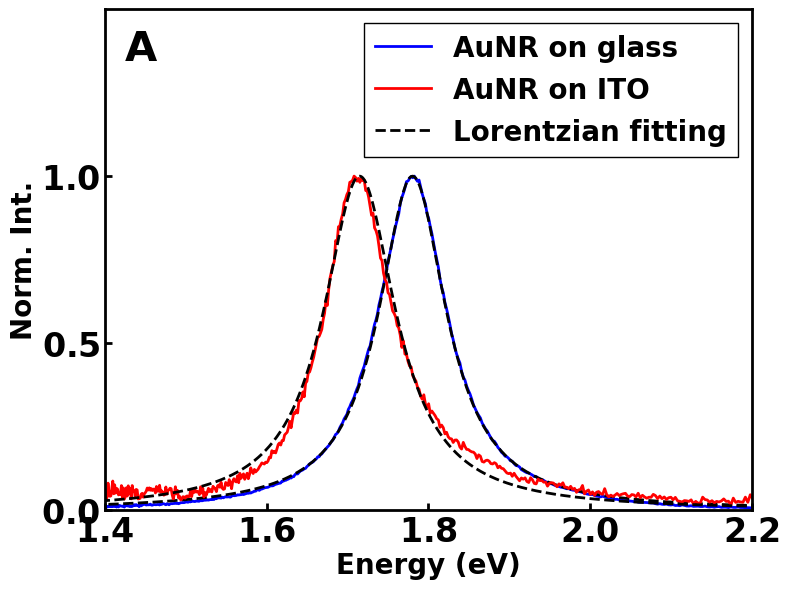

In [5]:
fig, ax = plt.subplots()

# AuNR on glass
part_num = 7

max_int_glass, eres_glass, linewidth_glass = Lorentzian.lorentzian(fig1_glass_data['exp_ene'][part_num-1], fig1_glass_data['exp_dfs'][part_num-1])
fitting_exp_glass = Lorentzian.func(fig1_glass_data['exp_ene'][part_num-1], max_int_glass, eres_glass, linewidth_glass)

ax.plot(fig1_glass_data['exp_ene'][part_num-1], [i/max(fig1_glass_data['exp_dfs'][part_num-1]) for i in fig1_glass_data['exp_dfs'][part_num-1]], c='b', lw=2, label='AuNR on glass')
ax.plot(fig1_glass_data['exp_ene'][part_num-1], [i/max(fitting_exp_glass) for i in fitting_exp_glass], c='k', lw=2, ls='--')

# AuNR on ITO
part_num = 3
max_int_ito, eres_ito, linewidth_ito = Lorentzian.lorentzian(fig1_ito_data['exp_ene'][part_num-1], fig1_ito_data['exp_dfs'][part_num-1])
fitting_exp_ito = Lorentzian.func(fig1_ito_data['exp_ene'][part_num-1], max_int_ito, eres_ito, linewidth_ito)

ax.plot(fig1_ito_data['exp_ene'][part_num-1], [i/max(fig1_ito_data['exp_dfs'][part_num-1]) for i in fig1_ito_data['exp_dfs'][part_num-1]], c='r', lw=2, label='AuNR on ITO')
ax.plot(fig1_ito_data['exp_ene'][part_num-1], [i/max(fitting_exp_ito) for i in fitting_exp_ito], c='k', lw=2, ls='--', label='Lorentzian fitting')

ax.set_xticks([1.4, 1.6, 1.8, 2.0, 2.2])
ax.set_yticks([0.0, 0.5, 1.0])
ax.set_xlabel('Energy (eV)')
ax.set_ylabel('Norm. Int.')
ax.set_xlim(1.4, 2.2)
ax.set_ylim(0, 1.5)

ax.text(0.03, 0.96, 'A', ha='left', va='top', transform=ax.transAxes, fontsize=30)

# plt.text(1.22, 0.75, f"R$^2$: {round(R2, 5)}", fontsize=20)
# print(f'R2: {round(R2, 5)}')
plt.legend(fontsize=20)

# plt.savefig("ITO_Figure1A.svg", format="svg", dpi=300)

## Figure 1B 

In [6]:
glass_exp_data = pd.read_csv(Path(p_data, '100323_ZJ_exp_glass_final.csv'))
glass_exp_data['exp_ene'] = [ast.literal_eval(df) for df in glass_exp_data['exp_ene']]
glass_exp_data['exp_dfs'] = [ast.literal_eval(df) for df in glass_exp_data['exp_dfs']]
glass_exp_data['fitting'] = [ast.literal_eval(df) for df in glass_exp_data['fitting']]
print(glass_exp_data.shape)

p_ito = Path('Z:/Katsuya Shiratori/004_coding/python/ITO_project/zhenyang_ito_analysis')
ito_exp_data = pd.read_csv(Path(p_data, '100323_ZJ_exp_ito_final.csv'))
ito_exp_data['exp_ene'] = [ast.literal_eval(df) for df in ito_exp_data['exp_ene']]
ito_exp_data['exp_dfs'] = [ast.literal_eval(df) for df in ito_exp_data['exp_dfs']]
ito_exp_data['fitting'] = [ast.literal_eval(df) for df in ito_exp_data['fitting']]
print(ito_exp_data.shape)

# particles on glass outliers particles 47, 67, 71
outliers_particles = [47, 67, 71]
glass_exp_data = glass_exp_data.drop(outliers_particles)
glass_exp_data.reset_index(drop=True, inplace=True)
print(glass_exp_data.shape)

(132, 11)
(149, 11)
(129, 11)


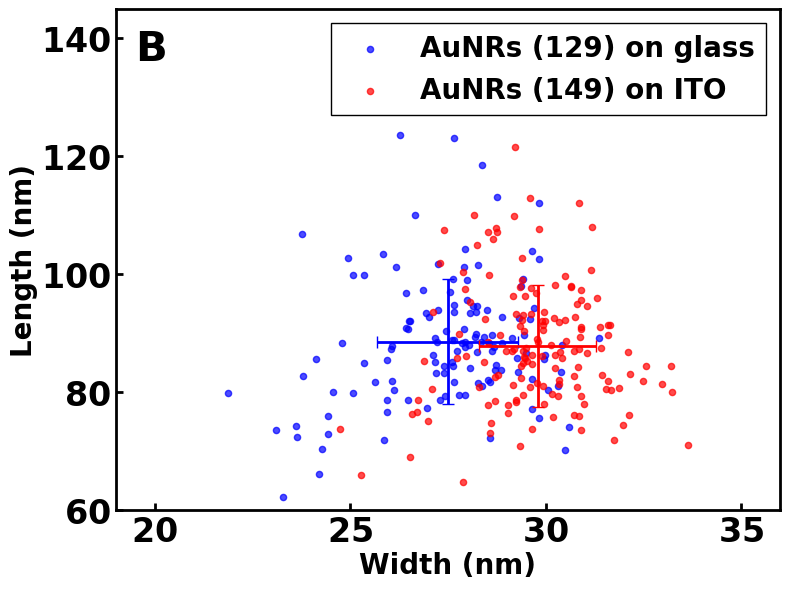

In [7]:
fig, ax = plt.subplots()

width_mean_glass = round(glass_exp_data['width'].mean(), 1)
width_std_glass = round(glass_exp_data['width'].std(), 1)
length_mean_glass = round(glass_exp_data['length'].mean(), 1)
length_std_glass = round(glass_exp_data['length'].std(), 1)

width_mean_ito = round(ito_exp_data['width'].mean(), 1)
width_std_ito = round(ito_exp_data['width'].std(), 1)
length_mean_ito = round(ito_exp_data['length'].mean(), 1)
length_std_ito = round(ito_exp_data['length'].std(), 1)

# label_glass = f'AuNRs ({glass_exp_data.shape[0]}) on glass: W {width_mean_glass} ± {width_std_glass}, L {length_mean_glass} ± {length_std_glass} nm'
label_glass = f'AuNRs ({glass_exp_data.shape[0]}) on glass'
ax.scatter(glass_exp_data['width'], glass_exp_data['length'], s=20, color='blue', alpha=0.7, label=label_glass)
ax.errorbar(width_mean_glass, length_mean_glass, yerr=length_std_glass, xerr=width_std_glass, color='blue', linewidth=2, capsize=4)

# label_ito = f'AuNRs ({ito_exp_data.shape[0]}) on ITO: W {width_mean_ito} ± {width_std_ito}, L {length_mean_ito} ± {length_std_ito} nm'
label_ito = f'AuNRs ({ito_exp_data.shape[0]}) on ITO'
ax.scatter(ito_exp_data['width'], ito_exp_data['length'], s=20, color='red', alpha=0.7, label=label_ito)
ax.errorbar(width_mean_ito, length_mean_ito, yerr=length_std_ito, xerr=width_std_ito, color='red', linewidth=2, capsize=4)

ax.text(0.03, 0.96, 'B', ha='left', va='top', transform=ax.transAxes, fontsize=30)
ax.set_ylim(60, 145)
ax.set_xlim(19, 36)

ax.set_xlabel('Width (nm)')
ax.set_ylabel('Length (nm)')
ax.legend(fontsize=20)

# plt.savefig("ITO_Figure1B.svg", format="svg", dpi=300)

In [8]:
glass_exp_data.head()

,exp_ene,exp_dfs,fitting,imax,eres,linewidth,width,length,aspect_ratio,volume,surface_area
0,"[2.65590681652542, 2.6514202069882, 2.64694924...","[0.0165157082192421, 0.0123461189692985, 0.015...","[0.025451036558040943, 0.02571543749944809, 0....",2.152379,1.806586,0.094172,29.4556,89.6873,3.044830,54425.522446,8299.438216
1,"[2.65590681652542, 2.6514202069882, 2.64694924...","[-0.0019272898287982, 0.0124581199392661, 0.01...","[0.008591050079768788, 0.008663423138079744, 0...",0.948386,1.907673,0.101640,26.9758,77.3749,2.868308,39082.873362,6557.288724
2,"[2.65590681652542, 2.6514202069882, 2.64694924...","[0.0099320151757856, 0.0057651120455874, 0.008...","[0.010928817788553086, 0.011024442509271728, 0...",1.173182,1.887887,0.099247,25.9489,76.7494,2.957713,36014.169980,6256.678137
3,"[2.65590681652542, 2.6514202069882, 2.64694924...","[0.0023237126662831, 0.0054035463151361, 0.012...","[0.06313591164524725, 0.06403522759862237, 0.0...",2.611418,1.687022,0.097867,27.2571,101.7658,3.733552,54079.873876,8714.277211
4,"[2.65590681652542, 2.6514202069882, 2.64694924...","[0.0073808503423951, 0.0050724311490632, 0.011...","[0.01146877410787831, 0.011562460120154992, 0....",1.152206,1.923694,0.109805,29.6628,77.2301,2.603601,46537.537957,7196.952120


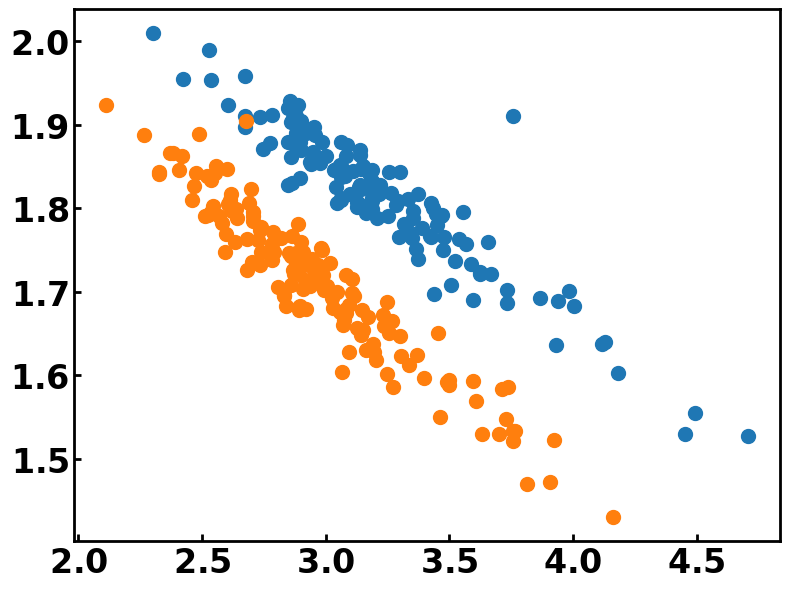

In [10]:
plt.scatter(glass_exp_data['aspect_ratio'], glass_exp_data['eres'])
plt.scatter(ito_exp_data['aspect_ratio'], ito_exp_data['eres'])

## Figure 2